In [1]:
import numpy as np
from pathlib import Path
from importlib import reload

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
# custom libraries
import sys, os
sys.path.append(os.path.abspath('../../spaths'))
import spaths

In [277]:
# underlying OU process coefficients
def drift_ou(t, u, du):
    du[0] = 0.01
    du[1] = u[0] - u[1]

def dispersion_ou(t, u, du):
    du[0] = .01#np.sqrt(0.01)
    du[1] = np.sqrt(.6)

sde_ou = spaths.ItoSDE(drift_ou, dispersion_ou)

In [278]:
# seed setting and solver
seed = 3579
rng = np.random.default_rng(seed)
rng.integers(10**3);  # warm up of RNG

# stochastic solver
em = spaths.EulerMaruyama(rng)

In [366]:
# simulation params
dt = .05
x0, y0 = 1.0, 1.0
tspan = (0.0, 1000)

In [367]:
ens0 = np.array([[x0,y0]]) #spaths.make_ens(x0, y0)
sol_ou = em.solve(sde_ou, ens0, tspan, dt)

In [368]:
sol_ou.p.shape

(1, 20002, 2)

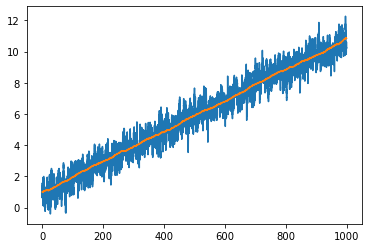

In [369]:
path = sol_ou.p[0]
plt.plot(sol_ou.t, path.T[1])
plt.plot(sol_ou.t, path.T[0]);

In [370]:
data = path[::10]

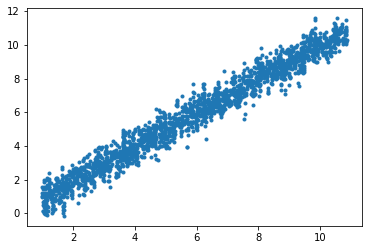

In [371]:
plt.plot(*data.T, '.');

In [372]:
# transformation
fwdF = lambda u: np.asarray([u[1], np.cos(2*u[0] - u[1])])

In [373]:
dataF = fwdF(data.T).T

In [374]:
dataF.shape

(2001, 2)

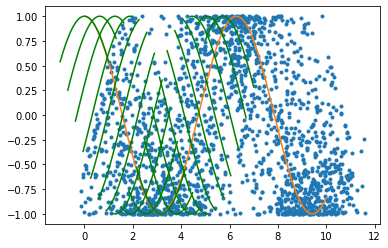

In [387]:
plt.plot(*dataF.T, '.');
plt.plot(x:=np.linspace(0, 10, 100), np.cos(x));
for u0 in np.linspace(0, 6, 20):
    plt.plot(v:=np.linspace(u0-1, u0+1, 100), np.cos(v - 2*u0), color='g')